In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
chunk1=pd.read_csv("Data From October 2019 to Jan 2020.csv", thousands='.',parse_dates=['Time'])
chunk2=pd.read_csv("Data From Jan to April 2020.csv", thousands='.',parse_dates=['Time'])
chunk3=pd.read_csv("Data From April to July 2020.csv", thousands='.',parse_dates=['Time'])
print(chunk1.shape, chunk2.shape, chunk3.shape)

(185523, 22) (222676, 22) (241940, 22)


In [10]:
data = pd.concat([chunk1,chunk2,chunk3])
data.shape

(650139, 22)

In [11]:
data.drop(['Opportunities','Viewable Impressions','Viewability Measured Impressions','Fill Rate', 'Cost','Profit','Revenue','Profit Margin'],axis=1, inplace=True)
data = data.fillna(0)

data['Format Loads'] = data['Format Loads'].str.replace(",", "").astype(float)
data['Impressions'] = data['Impressions'].str.replace(",", "").astype(int)
data['Clicks'] = data['Clicks'].str.replace(",", "").astype(int)

data['Format Fill Rate'] = data['Format Fill Rate'].str.replace("%", "").astype(float)
data['Viewability Rate'] = data['Viewability Rate'].str.replace("%", "").astype(float).fillna(0)
data['Efficiency Rate'] = data['Efficiency Rate'].str.replace("%", "").astype(float)
data['CPM'] = data['CPM'].str.replace("$", "").astype(float)
data['CTR'] = data['CTR'].str.replace("%", "").astype(float)
data['25% View Rate'] = data['25% View Rate'].str.replace("%", "").astype(float)
data['50% View Rate'] = data['50% View Rate'].str.replace("%", "").astype(float)
data['75% View Rate'] = data['75% View Rate'].str.replace("%", "").astype(float)
data['100% View Rate'] = data['100% View Rate'].str.replace("%", "").astype(float)

In [12]:
data.dropna(inplace=True)
print(len(data['Domain'].unique()))
print(data.shape)


19130
(621975, 14)


In [13]:
data = data[data['Format Loads']>70000]
print(len(data['Domain'].unique()))
print(data.shape)

818
(60637, 14)


In [17]:
groupby_domains = data.groupby(['Domain']).agg({'Format Loads':np.sum,
                                'Impressions':np.sum,
                                'Format Fill Rate':np.mean,
                                'Viewability Rate':np.mean,
                                'Efficiency Rate':np.mean,
                                'CPM':np.mean,
                                'Clicks':np.sum,
                                'CTR':np.mean,
                                '25% View Rate':np.mean,
                                '50% View Rate':np.mean,
                                '75% View Rate':np.mean,
                                '100% View Rate':np.mean
                                }).sort_values( by= 'Format Loads',ascending=False).reset_index()
print(groupby_domains.shape)

(818, 13)


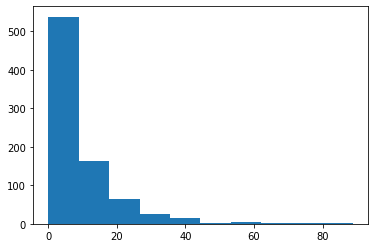

In [18]:
plt.hist(groupby_domains['Format Fill Rate']);

In [19]:
categories = pd.read_csv('Index Exchange Quality Inventory Mapping - Existing Acccount-Reseller-Domains - Compliance (1).csv')
categories.columns = ['Unnamed: 0', 'Partner/Seller Name', 'Partner/Seller ID',
       'Inventory Relationship\n(select from dropdown)', 'Domain',
       'Category', 'Monthly Volume', 'Ad Formats',
       'Banner/Player Dimensions']

print(len(categories['Category'].unique()), 'categories')

import re
pattern = '>'
renamed_categories = []
for string in categories['Category']:
    text = string
    match = re.search(pattern, text)
    s = match.start()
    renamed_categories.append(string[:s])
categories['Category'] = categories['Category'].replace(categories['Category'].values, renamed_categories )

print(len(categories['Category'].unique()))

52 categories
19


In [20]:
categories_importance = pd.DataFrame(categories.groupby('Category')['Monthly Volume'].sum().sort_values(ascending=False).reset_index())

total_formatloads = categories_importance['Monthly Volume'].sum()
categories_importance['Category importance'] = categories_importance['Monthly Volume'].apply(lambda x: x/total_formatloads)

domains_categories_importance = categories.merge(categories_importance, on='Category')
domains_categories_importance = domains_categories_importance[['Domain','Category','Category importance']]

In [33]:
data = data.merge(domains_categories_importance, on='Domain', how='left')
display(data.head(5))
data.isnull().sum()

,Time,Domain,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Cost,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,2019-10-01,cassilandianoticias.com.br,11739.0,1.06,125,93.50,100.00,1.64,0.164400,5,4.00,84.80,70.40,61.60,56.00,NaN,NaN
1,2019-10-01,noticiahoje.net,7788.0,0.77,60,79.66,100.00,1.78,0.042680,1,1.67,70.00,66.67,61.67,56.67,NaN,NaN
2,2019-10-01,sanleane.fr,7609.0,2.90,221,70.78,98.66,2.00,0.176360,1,0.45,78.28,71.04,65.61,62.44,NaN,NaN
3,2019-10-01,genealog.cl,7488.0,8.79,658,84.46,98.65,1.70,0.764591,6,0.91,78.72,70.52,64.89,58.51,NaN,NaN
4,2019-10-01,frasesfamosas.com.br,14985.0,17.18,2575,82.84,99.88,1.59,3.270630,18,0.70,84.47,80.74,76.70,70.33,NaN,NaN


Time                       0
Domain                     0
Format Loads               0
Format Fill Rate           0
Impressions                0
Viewability Rate           0
Efficiency Rate            0
CPM                        0
Cost                       0
Clicks                     0
CTR                        0
25% View Rate              0
50% View Rate              0
75% View Rate              0
100% View Rate             0
Category               63701
Category importance    63701
dtype: int64

In [34]:
groupby_domains = groupby_domains.merge(domains_categories_importance, on='Domain', how ='left')
display(groupby_domains.head(5))
groupby_domains.isnull().sum()

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Cost,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,mundopositivo.com.br,285746581.0,22545696,14.702036,73.539927,97.844509,1.809345,72.285346,2582,6.99,87.241091,91.123127,89.246473,85.103818,Community & Culture,0.066138
1,missyusa.com,283260483.0,17865040,8.351538,77.458803,98.253162,1.714103,202.453061,14721,9.77,74.682564,60.757521,51.520855,44.553077,News & Portals,0.586079
2,chinatimes.com,277894429.0,55088137,20.705273,89.555818,99.580073,1.786582,143.266952,392820,208.90,81.143745,71.738509,64.824764,58.431564,News & Portals,0.586079
3,memurlar.net,262190227.0,875571,0.724457,83.566957,91.964130,1.583261,6.560014,4501,45.44,78.316087,66.984022,59.034891,52.540000,Health & Wellness,0.020808
4,rediff.com,242482126.0,25913270,16.248836,77.252618,98.306691,1.737418,66.794454,101540,106.59,73.117164,61.589164,54.686909,49.173709,News & Portals,0.586079


Domain                   0
Format Loads             0
Impressions              0
Format Fill Rate         0
Viewability Rate         0
Efficiency Rate          0
CPM                      0
Cost                     0
Clicks                   0
CTR                      0
25% View Rate            0
50% View Rate            0
75% View Rate            0
100% View Rate           0
Category               987
Category importance    987
dtype: int64

In [21]:
groupby_domains_NANs_corrected = pd.read_csv('groupby_domains_NANs_corrected.csv')
groupby_domains_NANs_corrected = groupby_domains_NANs_corrected.merge(categories_importance, on='Category')
groupby_domains_NANs_corrected = groupby_domains_NANs_corrected[['Domain','Category','Category importance']]

categories_by_importance_complete = domains_categories_importance.merge(groupby_domains_NANs_corrected, how = 'outer')


In [22]:
data = data.merge(categories_by_importance_complete, on='Domain', how='left')
display(data.head(5))
data.isnull().sum()

,Time,Domain,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,2019-10-01,riovagas.com.br,617493.0,0.57,3524,52.04,99.66,1.62,11,0.31,65.55,58.20,53.63,48.86,News & Portals,0.586079
1,2019-10-01,ilustrado.cl,111369.0,16.50,18375,93.24,99.74,1.60,523,2.85,81.12,71.43,63.59,56.15,News & Portals,0.586079
2,2019-10-01,limanowa.in,75407.0,0.95,718,88.24,98.63,1.58,2,0.28,82.31,71.73,63.93,58.77,News & Portals,0.586079
3,2019-10-01,applealmond.com,97442.0,15.07,14681,80.93,99.98,1.98,33,0.22,82.89,71.53,64.37,58.64,Tech & Gaming,0.019817
4,2019-10-01,tempo.co,818259.0,0.36,2926,84.68,97.02,1.72,19,0.65,81.34,73.86,68.11,63.09,News & Portals,0.586079


Time                      0
Domain                    0
Format Loads              0
Format Fill Rate          0
Impressions               0
Viewability Rate          0
Efficiency Rate           0
CPM                       0
Clicks                    0
CTR                       0
25% View Rate             0
50% View Rate             0
75% View Rate             0
100% View Rate            0
Category               3861
Category importance    3861
dtype: int64

In [23]:
groupby_domains = groupby_domains.merge(categories_by_importance_complete, on='Domain', how ='left')
display(groupby_domains.head(5))
groupby_domains.isnull().sum()

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category,Category importance
0,mundopositivo.com.br,285746581.0,22545696,14.702036,73.539927,97.844509,1.809345,2582,0.025418,87.241091,91.123127,89.246473,85.103818,Community & Culture,0.066138
1,missyusa.com,283260483.0,17865040,8.351538,77.458803,98.253162,1.714103,14721,0.083504,74.682564,60.757521,51.520855,44.553077,News & Portals,0.586079
2,chinatimes.com,277894429.0,55088137,20.705273,89.555818,99.580073,1.786582,392820,0.759636,81.143745,71.738509,64.824764,58.431564,News & Portals,0.586079
3,memurlar.net,262190227.0,875571,0.724457,83.566957,91.964130,1.583261,4501,0.493913,78.316087,66.984022,59.034891,52.540000,Health & Wellness,0.020808
4,rediff.com,242482126.0,25913270,16.248836,77.252618,98.306691,1.737418,101540,0.387600,73.117164,61.589164,54.686909,49.173709,News & Portals,0.586079


Domain                   0
Format Loads             0
Impressions              0
Format Fill Rate         0
Viewability Rate         0
Efficiency Rate          0
CPM                      0
Clicks                   0
CTR                      0
25% View Rate            0
50% View Rate            0
75% View Rate            0
100% View Rate           0
Category               183
Category importance    183
dtype: int64

In [25]:
data.to_csv('Global Report.csv')
groupby_domains.to_csv('Global groupby_domains.csv')

In [26]:
report = pd.read_csv('Global Report.csv',index_col =['Time'])
groupby_domains = pd.read_csv('Global groupby_domains.csv')
report.drop('Unnamed: 0', 1, inplace = True)
groupby_domains.drop('Unnamed: 0', 1, inplace = True)

### Adding a new variable that tell us if it´s a recurrent Domain (if it´s available more than 50% of the days)


In [27]:
#New DataFrame with the Domain and the recurrence:
recurrence = pd.DataFrame(report['Domain'].value_counts()).reset_index()
recurrence.columns = ['Domain', 'Recurrence']

#Adding the bynary column: 1 means that the Domain is available more than the 50% of the days:
recurrence['Domain Recurrence'] = list(map(lambda x: 1 if x>45 else 0 ,recurrence['Recurrence']))
recurrence = recurrence[['Domain', 'Domain Recurrence']]
recurrence = recurrence[recurrence['Domain Recurrence']==1] #I only keep the recurrent domains

#Adding the Domain Recurrence column to the main Dataframes
report['Domain Recurrence'] = report['Domain'].isin(recurrence['Domain'])
report['Domain Recurrence']= report['Domain Recurrence'].replace({True:1,False:0}) 

groupby_domains['Domain Recurrence'] = groupby_domains['Domain'].isin(recurrence['Domain'])
groupby_domains['Domain Recurrence']= groupby_domains['Domain Recurrence'].replace({True:1,False:0}) 


In [30]:
report.to_csv('Global Report.csv')
groupby_domains.to_csv('Global groupby_domains.csv')

## RELATIONSHIP BETWEEN VARIABLES

In [8]:
report = pd.read_csv('Global Report.csv',index_col =['Time'])
groupby_domains = pd.read_csv('Global groupby_domains.csv')
groupby_domains.drop('Unnamed: 0', 1, inplace = True)

In [10]:
groupby_domains.corr(method = 'pearson')

,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate,Category importance,Domain Recurrence
Format Loads,1.000000,0.697619,0.104228,-0.037747,0.065719,-0.001234,0.553883,-0.015314,0.066981,0.077977,0.081000,0.080556,0.071673,0.496390
Impressions,0.697619,1.000000,0.408641,-0.023431,0.083665,-0.008002,0.819975,-0.015042,0.089399,0.114378,0.125393,0.126473,0.027726,0.337082
Format Fill Rate,0.104228,0.408641,1.000000,0.116290,0.198161,-0.026814,0.276744,-0.011055,0.213245,0.255506,0.275260,0.284157,-0.013608,0.145664
Viewability Rate,-0.037747,-0.023431,0.116290,1.000000,0.506655,0.156261,0.030774,0.297650,0.669452,0.557389,0.487709,0.440479,0.166241,0.025098
Efficiency Rate,0.065719,0.083665,0.198161,0.506655,1.000000,0.434325,0.061622,0.106069,0.558489,0.461769,0.413579,0.381542,0.047648,0.109389
CPM,-0.001234,-0.008002,-0.026814,0.156261,0.434325,1.000000,-0.029722,-0.080332,0.187219,0.155455,0.135826,0.129330,0.002944,-0.027552
Clicks,0.553883,0.819975,0.276744,0.030774,0.061622,-0.029722,1.000000,0.110669,0.068458,0.081272,0.086542,0.086538,0.071726,0.269748
CTR,-0.015314,-0.015042,-0.011055,0.297650,0.106069,-0.080332,0.110669,1.000000,0.065692,0.004595,-0.025414,-0.039395,0.133461,0.029558
25% View Rate,0.066981,0.089399,0.213245,0.669452,0.558489,0.187219,0.068458,0.065692,1.000000,0.962940,0.923942,0.884881,0.179504,0.118277
50% View Rate,0.077977,0.114378,0.255506,0.557389,0.461769,0.155455,0.081272,0.004595,0.962940,1.000000,0.988172,0.964008,0.172221,0.121909


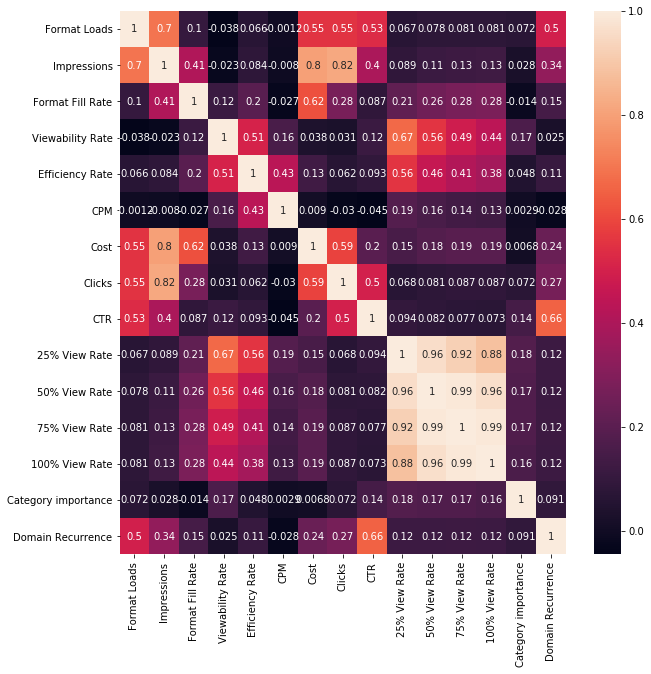

In [21]:
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(groupby_domains.corr(), annot = True)

- Only the variables about the View Rate percentages are strongly correlated (more than 90%). I´ll try to convert these 3 variables into only one 

### UNDERSTANDING THE DATA WITH GRAPHS

### General shape of the Format Loads and Impressions over the 3 months:

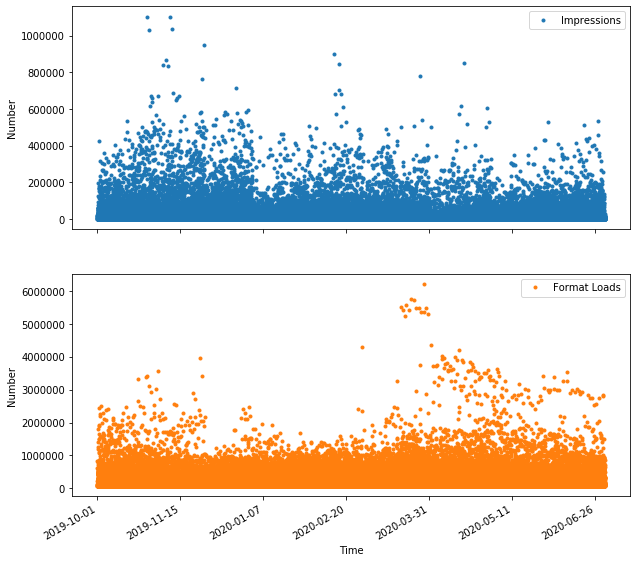

In [27]:
col_graf = ['Impressions', 'Format Loads'] 
ejes = report[col_graf].plot(marker='.', linestyle='None',figsize=(10,10),subplots=True)
for eje in ejes:
  eje.set_ylabel('Number')

### Distribution of the categories

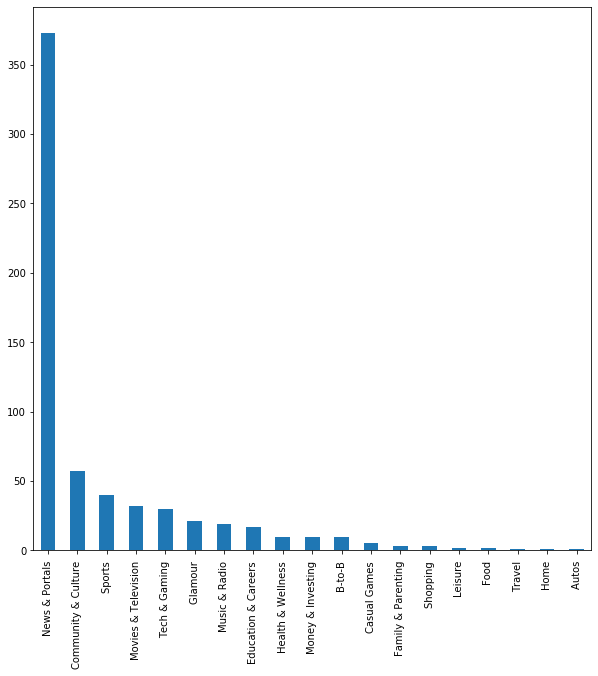

In [28]:
categories=groupby_domains['Category'].value_counts()
categories.plot(kind='bar');

### Impressions evolution through the three months

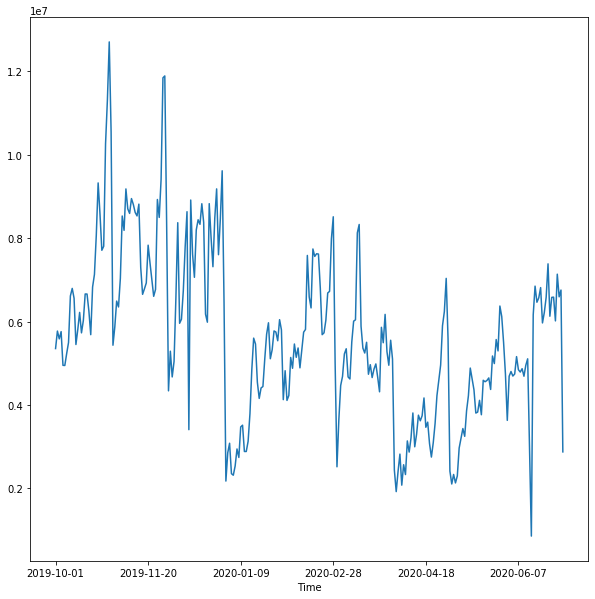

In [30]:
report.groupby(report.index)['Impressions'].sum().plot(kind='line', rot = 0)

### Number of recurrent Domains

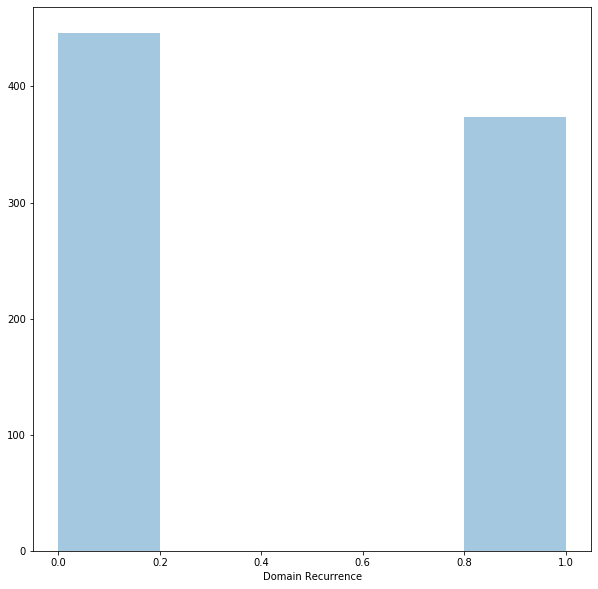

In [31]:
sns.distplot(groupby_domains['Domain Recurrence'], kde = False);

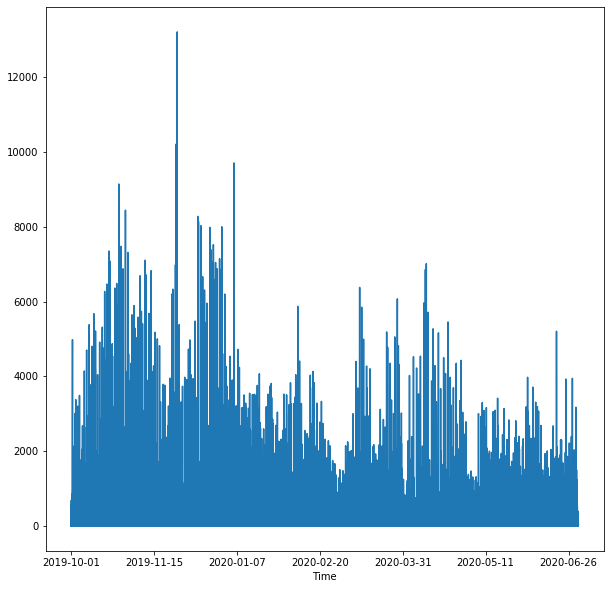

In [12]:
plt.rcParams['figure.figsize']=(10,10)
report.Clicks.plot(kind= 'line')

In [251]:
ffr_bycategories = pd.DataFrame(report.groupby(['Time', 'Category'])['Format Fill Rate'].mean()).reset_index()

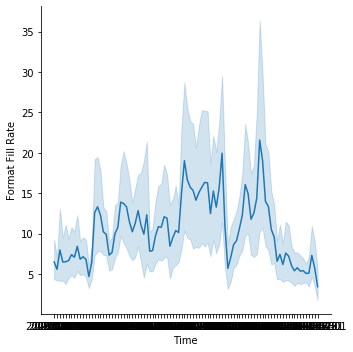

In [258]:
sns.relplot(x="Time", y='Format Fill Rate', kind="line", data=ffr_bycategories)